In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

np.random.seed(0)

In [12]:
df = pd.read_csv("./datasets/wdbc.data", header=None).drop(columns=[0])
df_malignant = df[df[1] == "M"].drop(columns=[1])
df_benign = df[df[1] == 'B'].drop(columns=[1])

<center> 5-elementowa Próbka danych. Kolumna 1 jest klasą, reszta kolumn jest numeryczna i oznacza odpowiednie cechy. </center> 

In [13]:
display(df.sample(5))
print(f"wymiar danych: {df.shape}")

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
57,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.870,30.70,115.70,985.5,0.1368,0.42900,0.3587,0.18340,0.3698,0.10940
410,B,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,...,13.050,36.32,85.07,521.3,0.1453,0.16220,0.1811,0.08698,0.2973,0.07745
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.1442,0.25760,0.3784,0.19320,0.3063,0.08368
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,0.1722,...,9.262,17.04,58.36,259.2,0.1162,0.07057,0.0000,0.00000,0.2592,0.07848
547,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,...,10.830,22.04,71.08,357.4,0.1461,0.22460,0.1783,0.08333,0.2691,0.09479


wymiar danych: (569, 31)


<center> Datasety dla kolejno klas M oraz B. Usunięto kolumnę 1 </center> 

In [14]:
display(df_malignant.head(5))
print(f"wymiar danych: {df_malignant.shape}")

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


wymiar danych: (212, 30)


In [15]:
display(df_benign.head(5))
print(f"wymiar danych: {df_benign.shape}")

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


wymiar danych: (357, 30)


<center> 
Autorzy w opisie danych umieszczają notkę, że dane składają się z 10 cech:
	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

z czego 30 cech wzięło się z 3 osobnych wartości dla każdego z pomiarów: `mean`, `standard error` i `largest value`. 
Do celów analizy wystarczy nam wzięcie jedynie wartości `mean`, zatem zostaje nam 10 cech.
</center> 

10

In [67]:
col_names = [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave",
    "symmetry",
    "fractal"
]
columns = list(range(2, 12))
columns_dict = dict(zip(columns, col_names))

df_benign = df_benign[columns].rename(columns=columns_dict)
df_malignant = df_malignant[columns].rename(columns=columns_dict)

In [68]:
df_benign

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502


In [69]:
df_malignant

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


<center>
<h4>
2. Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe,
odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle,
itp)
</h4>
</center>

In [85]:
def pointwise_statistics(df):
    stats = df.describe().drop(index='count')
    stats.loc['median'] = df.median(axis=0)
    stats.loc['mode'] = df.mode(axis=0).iloc[0]
    stats.loc['variance'] = df.var(axis=0)
    stats.loc['kurtosis'] = df.kurtosis(axis=0)
    stats.loc['skewness'] = df.skew(axis=0)
    stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']

    return stats

pointwise_statistics(df_benign)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750
median,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
mode,10.260000,14.930000,82.610000,512.200000,0.085110,0.114700,0.000000,0.000000,0.160100,0.059070
variance,3.170222,15.961021,139.415582,18033.030100,0.000181,0.001139,0.001887,0.000253,0.000615,0.000046


Obserwacje:
- Po tabeli statystyk widac od razu, że dane mają bardzo rozbieżne skale, cecha nr 3 i cecha nr 11 różnią się o 3 rzędy (w średniej).
- 

<center>
<h4>
3. Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej)
oraz metoda nieparametryczna (bootstrap) dla średniej i porównanie
</h4>
</center>

<center>
<h4>
4. Różne wykresy (im więcej tym lepiej). Powinny być histogramy, wykresy
kwantyl-kwantyl, boxplot i inne.
</h4>
</center>

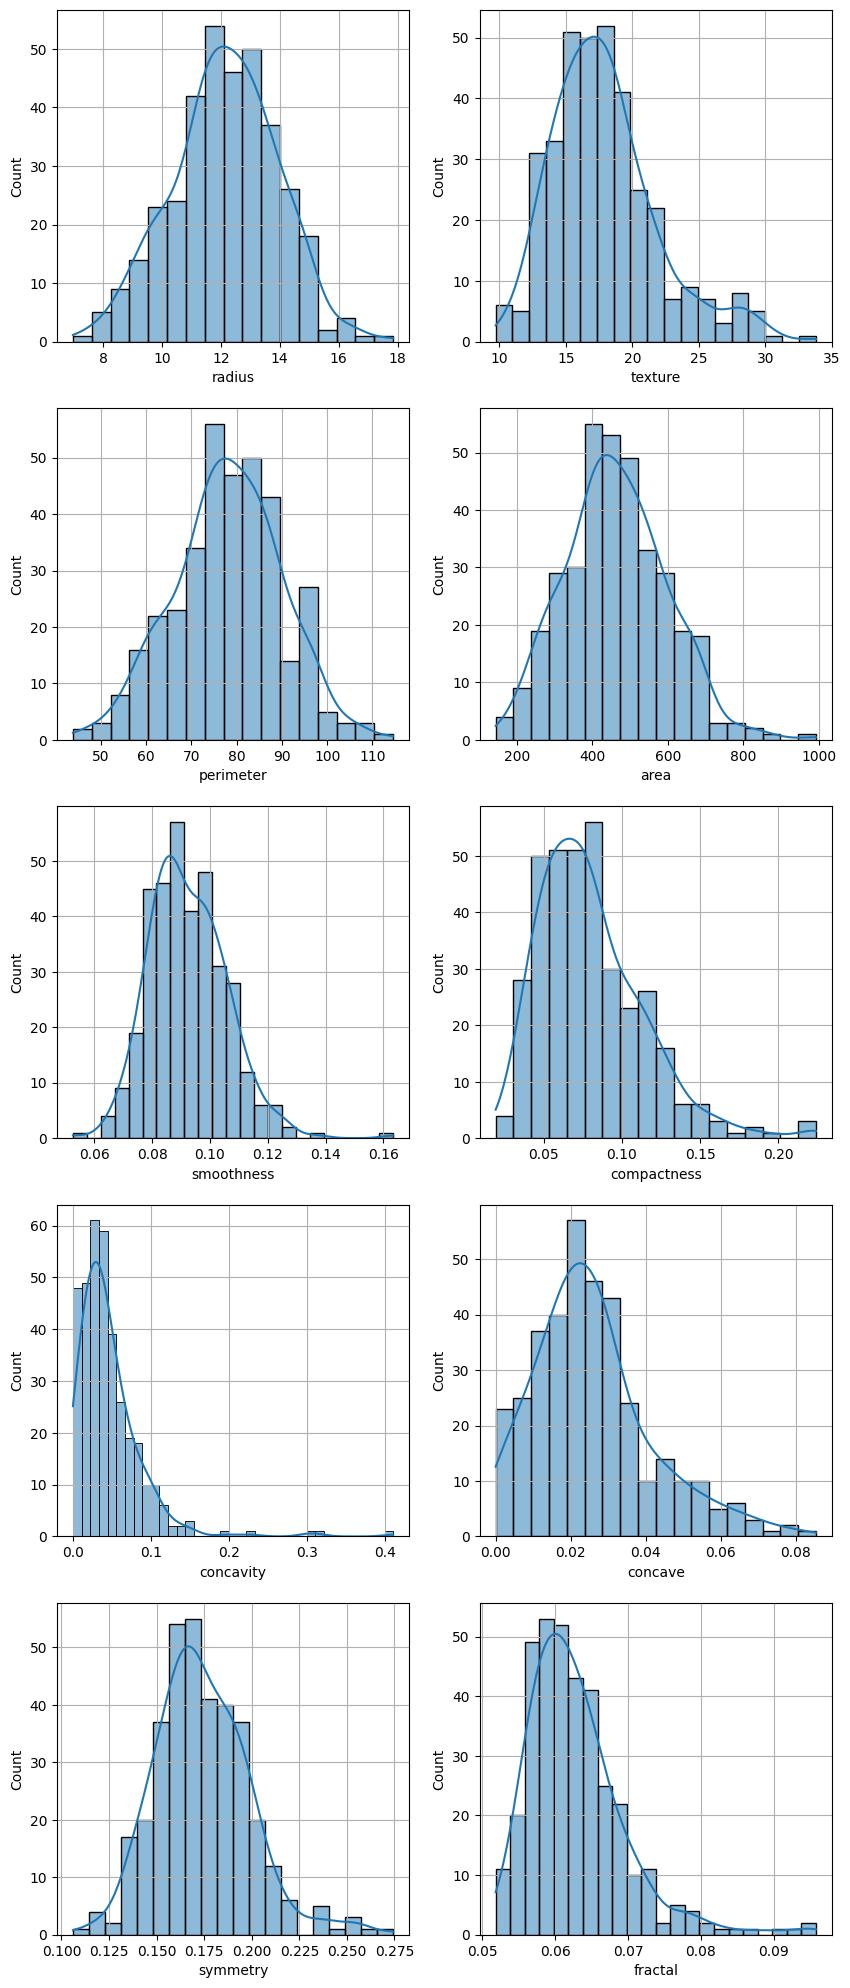

In [97]:
fig, ax = plt.subplots(5, 2, figsize=(10, 25))

for i, col in enumerate(col_names):
    ii = i % 5
    j = i // 5
    sns.histplot(data=df_benign[col], kde=True, ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].grid(True)

plt.show()

<center>
<h4>
5. Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego
</h4>
</center>

<center>
<h4>
6. Estymator jądrowy gęstości
</h4>
</center>